In [1]:
%matplotlib inline
import pyne
from decay_compare import *
from pyne import data
from pyne import rxname
import tables as tb

/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
%%time
nucs = cram.NUCS
n = 22
nucs = cram.NUCS[100*n:100*(n+1)]
#nucs = cram.NUCS[:100*(n+1)]
nucs = ['Lu153', 'Tm149']
batemans, crammeds, diagexps = run_nuclides(nucs=nucs, verbose=True)

Running nuc Lu153
Running nuc Tm149
CPU times: user 584 ms, sys: 4 ms, total: 588 ms
Wall time: 587 ms


In [3]:
NNUCS = len(crammeds)

In [4]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(nucs):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [5]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [6]:
sigma_diagdiff

array([  0.000000000000000000e+00,   5.421010862427522170e-20,
         3.231174267785264355e-27,   4.930380657631323784e-32,
         1.743152798421049495e-32,   4.930380657631323784e-32,
         0.000000000000000000e+00,   0.000000000000000000e+00,
         1.232595164407830946e-32,   2.465190328815661892e-32,
         2.465190328815661892e-32,   0.000000000000000000e+00,
         1.743152798421049495e-32,   0.000000000000000000e+00,
         1.743152798421049495e-32,   2.465190328815661892e-32,
         1.743152798421049495e-32,   0.000000000000000000e+00,
         0.000000000000000000e+00,   0.000000000000000000e+00,
         3.897808152438454715e-32,   2.465190328815661892e-32,
         2.465190328815661892e-32,   1.743152798421049495e-32,
         1.743152798421049495e-32,   2.465190328815661892e-32,
         0.000000000000000000e+00,   1.743152798421049495e-32])

# Difference plot for all nuclides

The red line is the mean difference with $1\sigma$ error bars

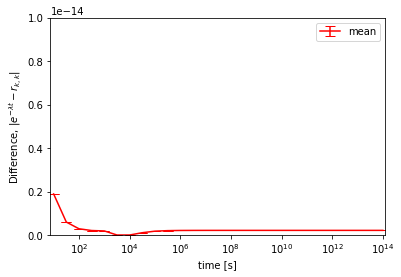

In [7]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray', alpha=0.01)
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=sigma_diagdiff[1:], color='red', capsize=5, label='mean')
plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 0.0, 1e-14])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
plt.legend(loc=0)

# Bateman Comparison

In [8]:
def bateman_diff_plot(nuc, batemans, crammeds):
    try:
        bateman = batemans[nuc]
        crammed = crammeds[nuc]
    except KeyError:
        print('Nuclide not in data!')
        return
    diff = diff_nuclide(bateman, crammed, abs=True)
    d = np.zeros((NTIMES, len(diff)), dtype=float)
    for i, (n, arr) in enumerate(diff.items()):
        if data.fpyield(nuc, n) > 0:
            print('skipping', n)
            continue
        plt.plot(TIMES, arr, label=n)
        d[:,i] = arr
    mu = d.mean(axis=1)
    sigma = d.std(axis=1)
    #plt.errorbar(TIMES, mu, yerr=sigma, capsize=5, color='black', label='mean')
    plt.xscale('log')
    #plt.yscale('log')
    #plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 1e-18, 1e-6])
    plt.xlabel('time [s]')
    plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
    plt.legend(loc=0)

In [9]:
#bateman_diff_plot('I131', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Sr90', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('H3', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('U235', batemans=batemans, crammeds=crammeds)

#bateman_diff_plot('Se86', batemans=batemans, crammeds=crammeds)

# Histogram of errors

In [10]:
diff_arrs = []
for nuc in nucs:
    diff = diff_nuclide(batemans[nuc], crammeds[nuc], abs=True, include_missing=False)
    diff_arr = np.empty((NTIMES, len(diff)), dtype=float)
    for i, (n, d) in enumerate(diff.items()):
        diff_arr[:,i] = d
        if np.abs(d).max() >= 1e-13:
            print(nuc, '->', n)
    diff_arrs.append(diff_arr)
diff_arrs = np.concatenate(diff_arrs, axis=1)
diff_arrs.shape

Lu153 -> Eu145
Lu153 -> Gd148
Lu153 -> Gd149
Lu153 -> Tb148
Lu153 -> Tb149
Lu153 -> Dy148
Lu153 -> Dy149
Lu153 -> Ho148
Lu153 -> Ho149
Lu153 -> Er149
Lu153 -> Tm149


(28, 45)

Text(0,0.5,'Count')

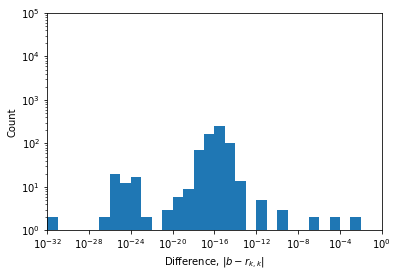

In [11]:
plt.hist(diff_arrs.flat, bins=np.logspace(-32, 0, 33), log=True)
plt.xscale('log')
plt.axis([1e-32, 1, 1e0, 1e5])
plt.xlabel('Difference, $\\left|b - r_{k,k}\\right|$')
plt.ylabel('Count')

Lu153 -> Tm149

CRAM
 [  0.000000000000000000e+00   2.437267862746852597e-03
   4.514043452713203922e-10   0.000000000000000000e+00
   1.080693623051634410e-15   1.321629391213861495e-16
   1.835546514927909888e-17   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00
   0.000000000000000000e+00   0.000000000000000000e+00]
Bateman
 [  0.000000000000000000e+000   6.329221666026402758e-004
   3.706910863844154215e-011   4.992875532806016567e-034
   2.371205044712402408e-106   0.000000000000000000e+000
   0.000000000000000000e+00

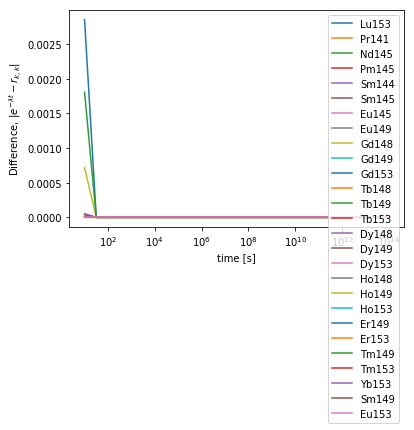

In [12]:
nuc = 'Lu153'
ouc = 'Tm149'
print(nuc + ' -> ' + ouc + '\n')
print('CRAM\n', crammeds[nuc][ouc])
print('Bateman\n', batemans[nuc][ouc])
print('Diff\n', batemans[nuc][ouc] - crammeds[nuc][ouc])
bateman_diff_plot(nuc, batemans=batemans, crammeds=crammeds)

In [13]:
data.decay_children('Tm149')

set([671480000, 681490000])

In [14]:
data.branch_ratio('Tm149', 'Er149')

0.998